<b><br>

## DPI argument

The `dpi` parameter in Matplotlib sets the resolution of the output image by specifying the dots per inch. This setting influences the pixel density, directly affecting the image's clarity and dimensions. High DPI settings produce sharper, more detailed visuals ideal for printing or viewing on high-resolution screens.

In contrast, lower DPI values yield images with less detail, optimized for web use where smaller file sizes are beneficial. Selecting the right DPI is essential to strike a balance between image quality, performance, and storage needs.

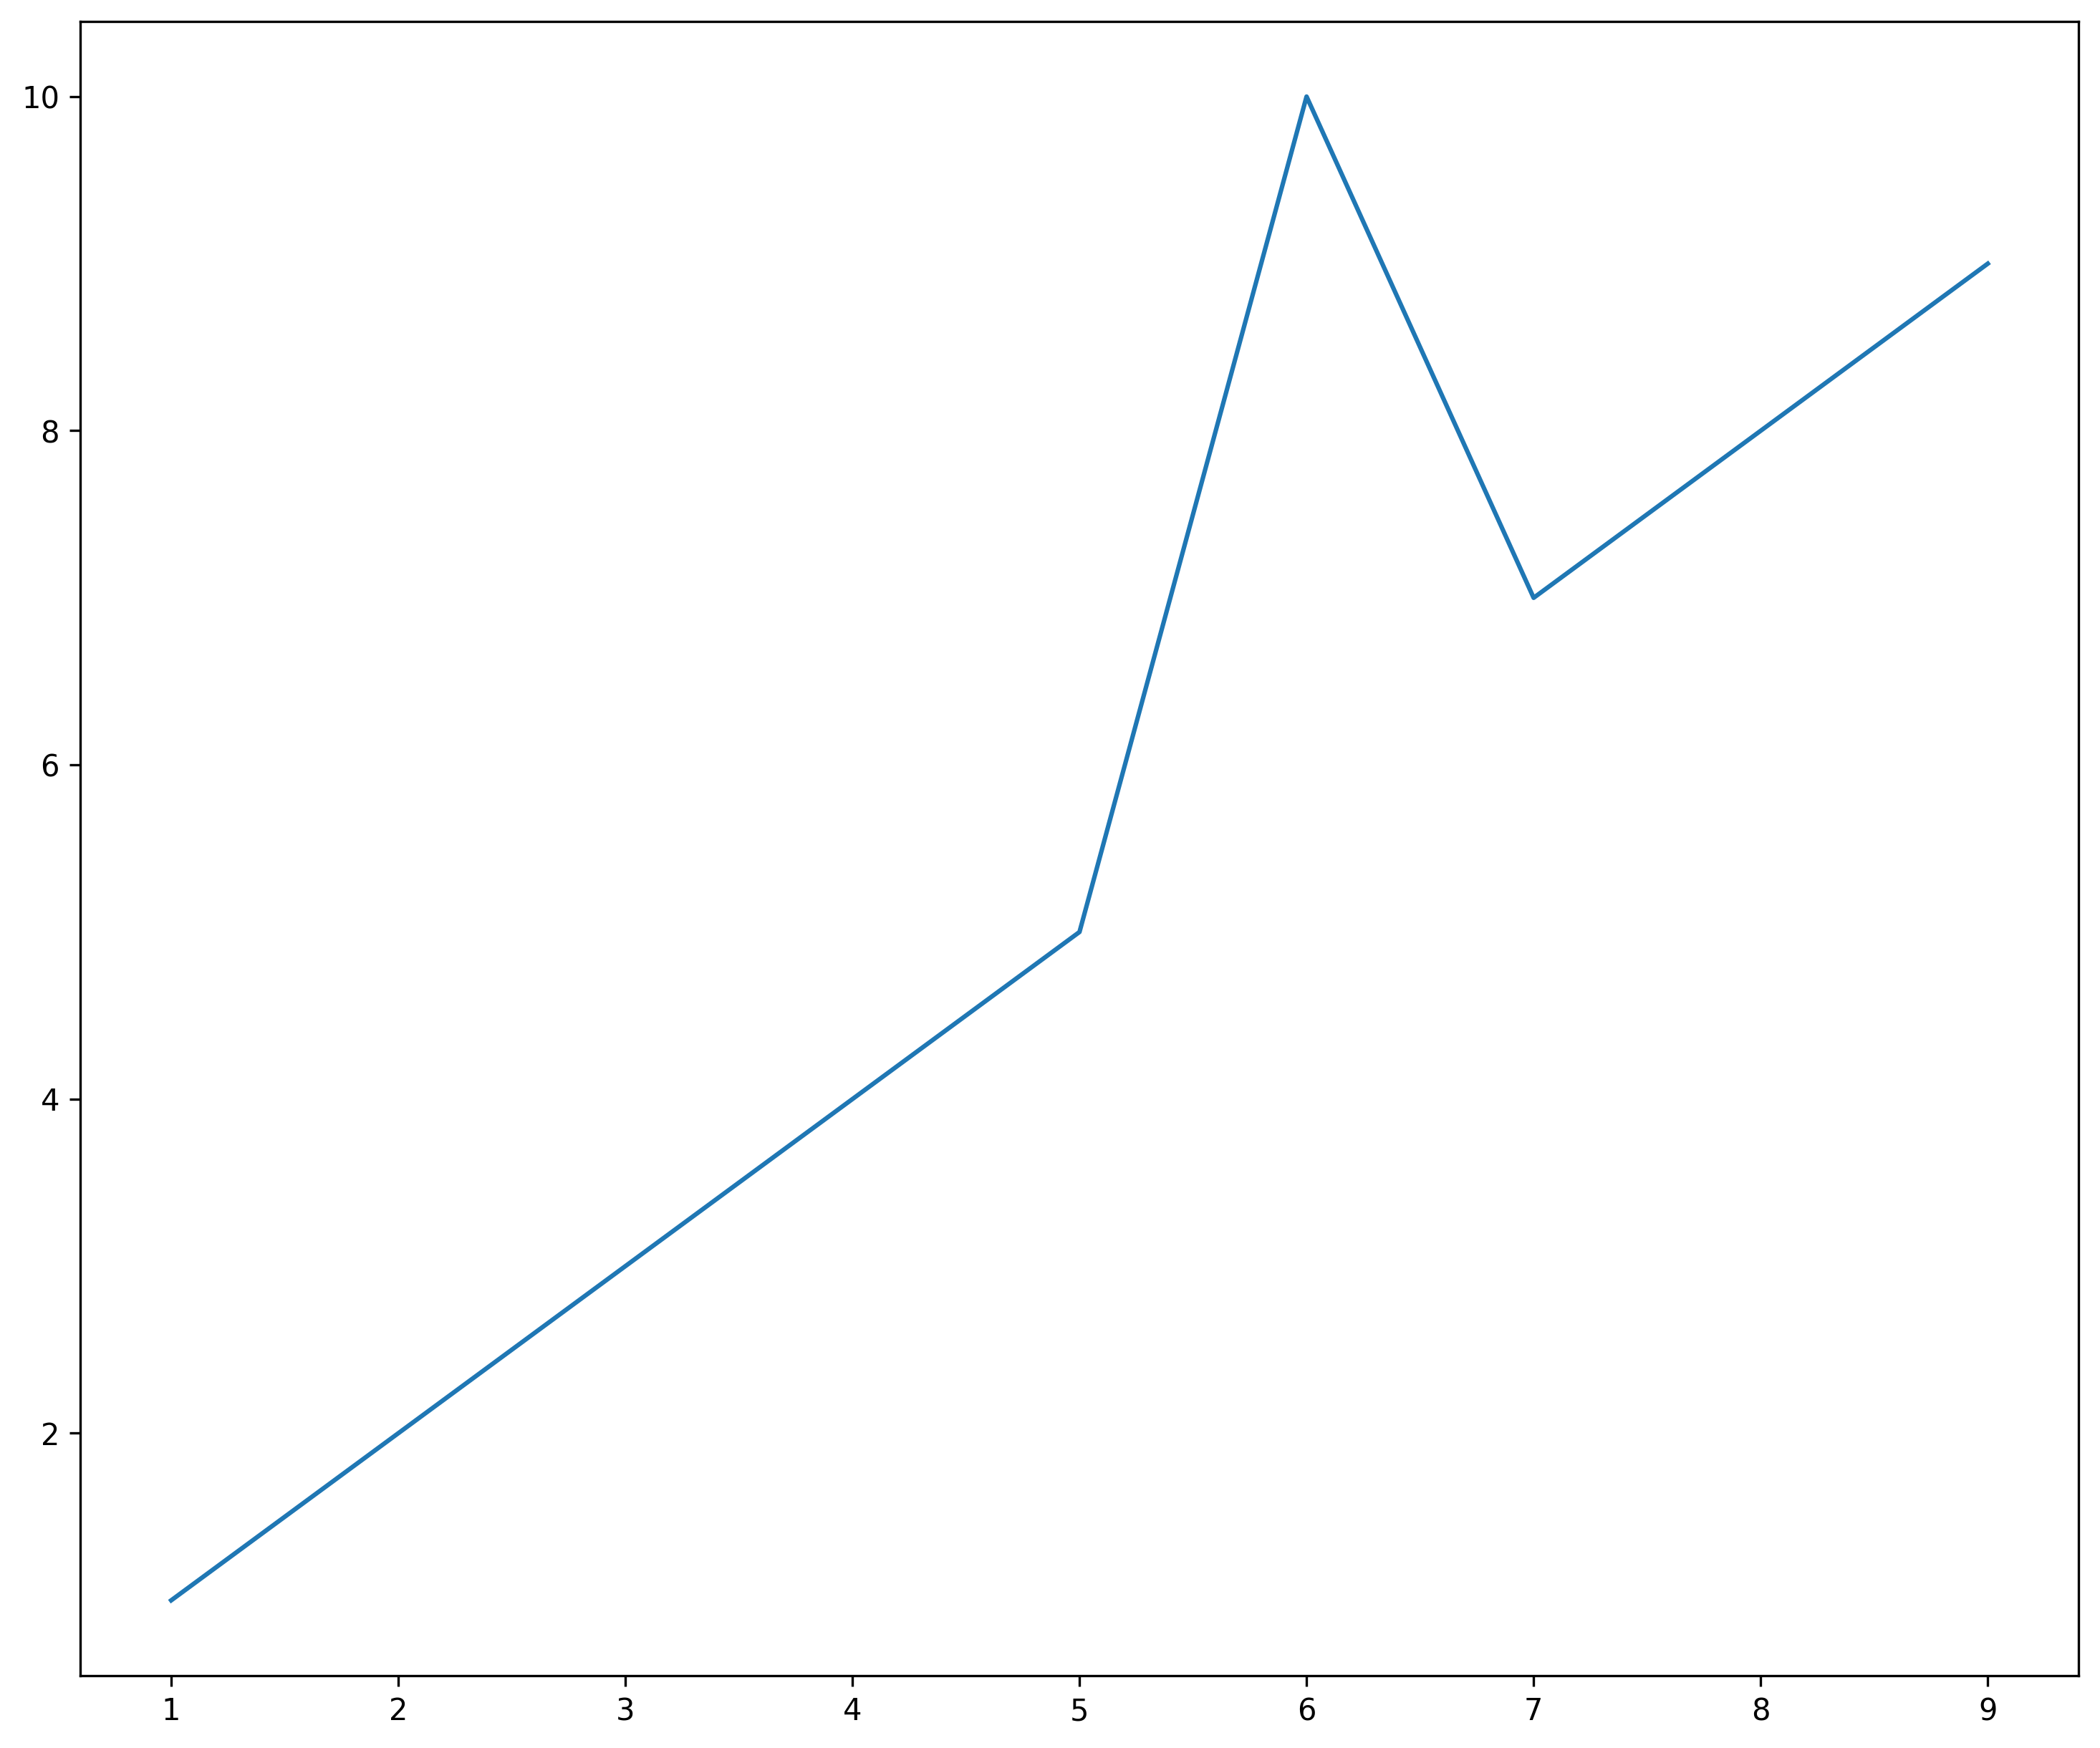

In [1]:
import matplotlib.pyplot as plt

# 1st method
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# 2nd method
fig, ax = plt.subplots(figsize=(12,10), dpi=300)

ax.plot(
   [1,2,3,4,5,6,7,8,9],
   [1,2,3,4,5,10,7,8,9]
)

# 3rd method
plt.savefig('dpi_tuto.png', dpi=300)
plt.show()

<b><br>

## Object oriented API

Matplotlib's object-oriented API grants enhanced control and customization of plots through direct interaction with figure and axes objects. This method differs from the state-based `pyplot` interface, offering a clearer and more adaptable way to craft and handle plots. You initiate by generating a `Figure` object and one or more `Axes` objects, which provide methods to adjust diverse elements of the plot like titles, labels, and annotations.

This structured approach is especially beneficial for assembling intricate, multi-plot figures and integrating plots into applications, providing meticulous command over the plotting setup.

Same output but much easier to customize in the second case.

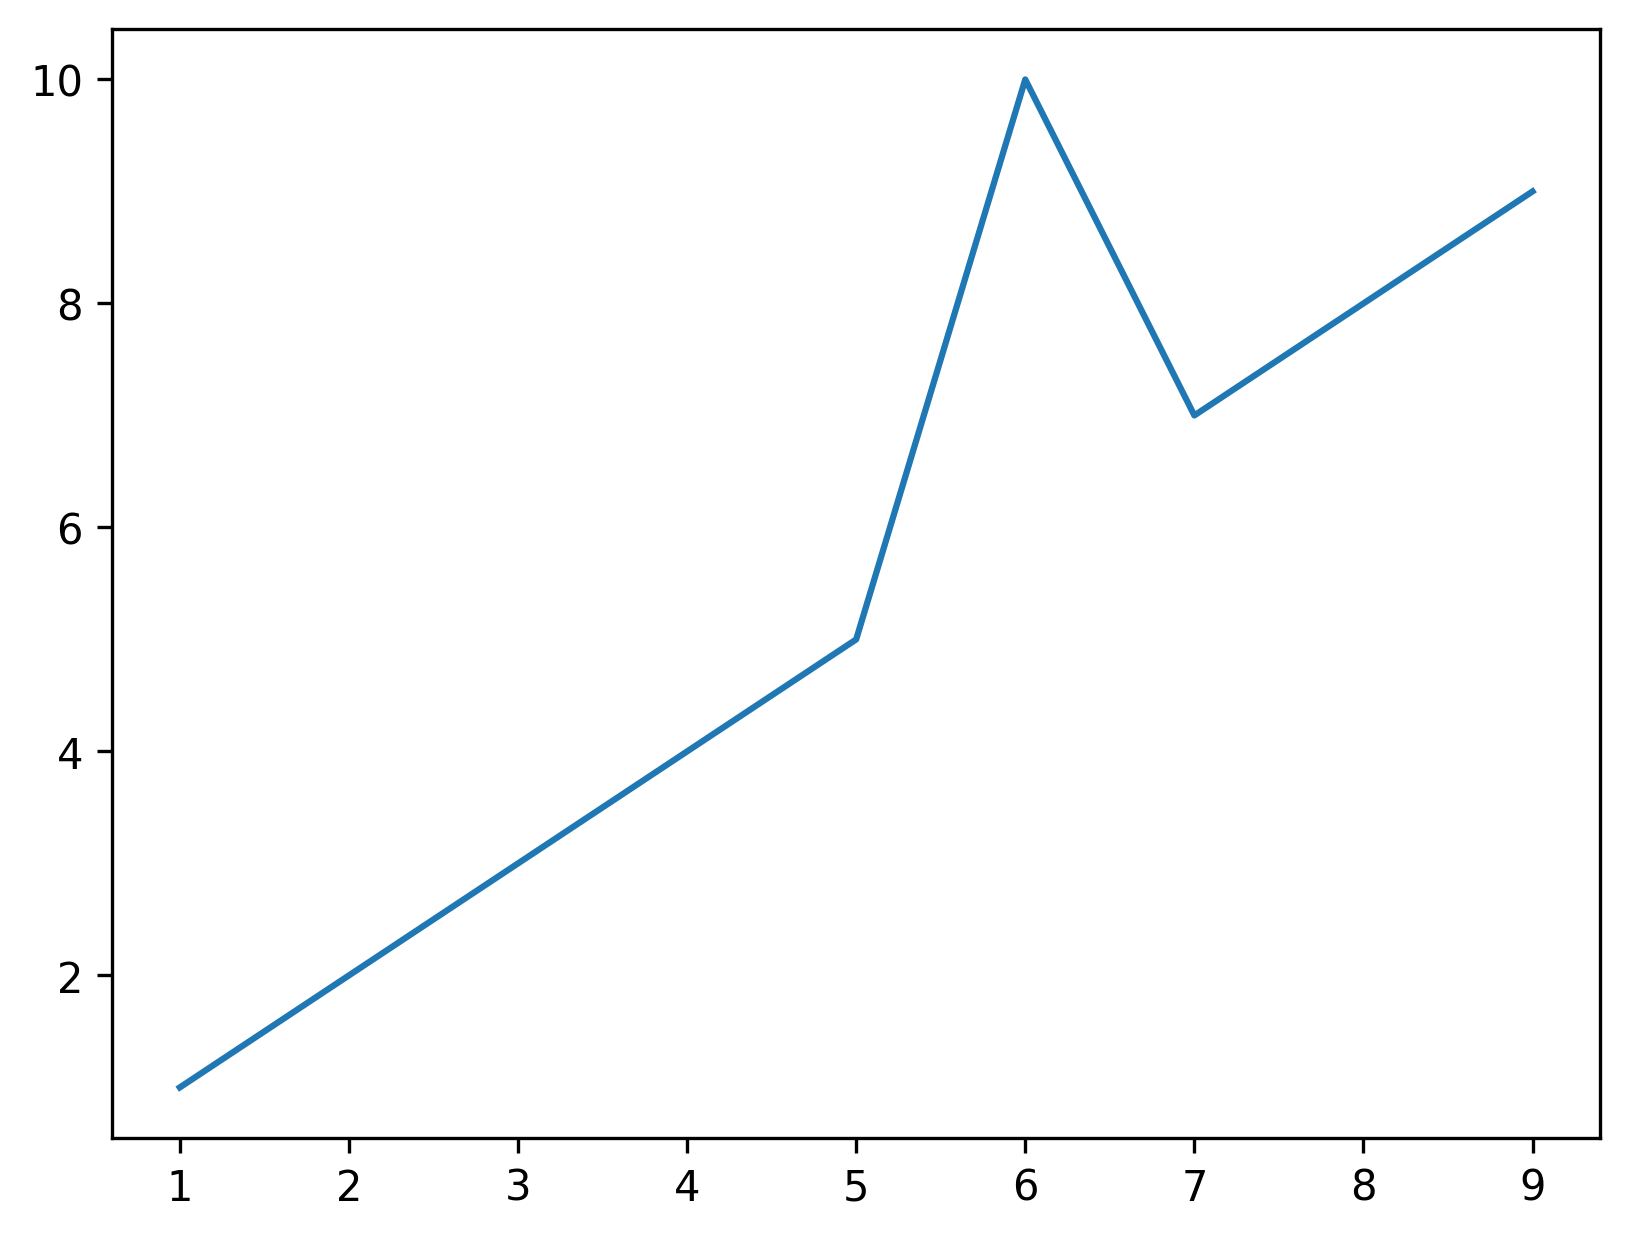

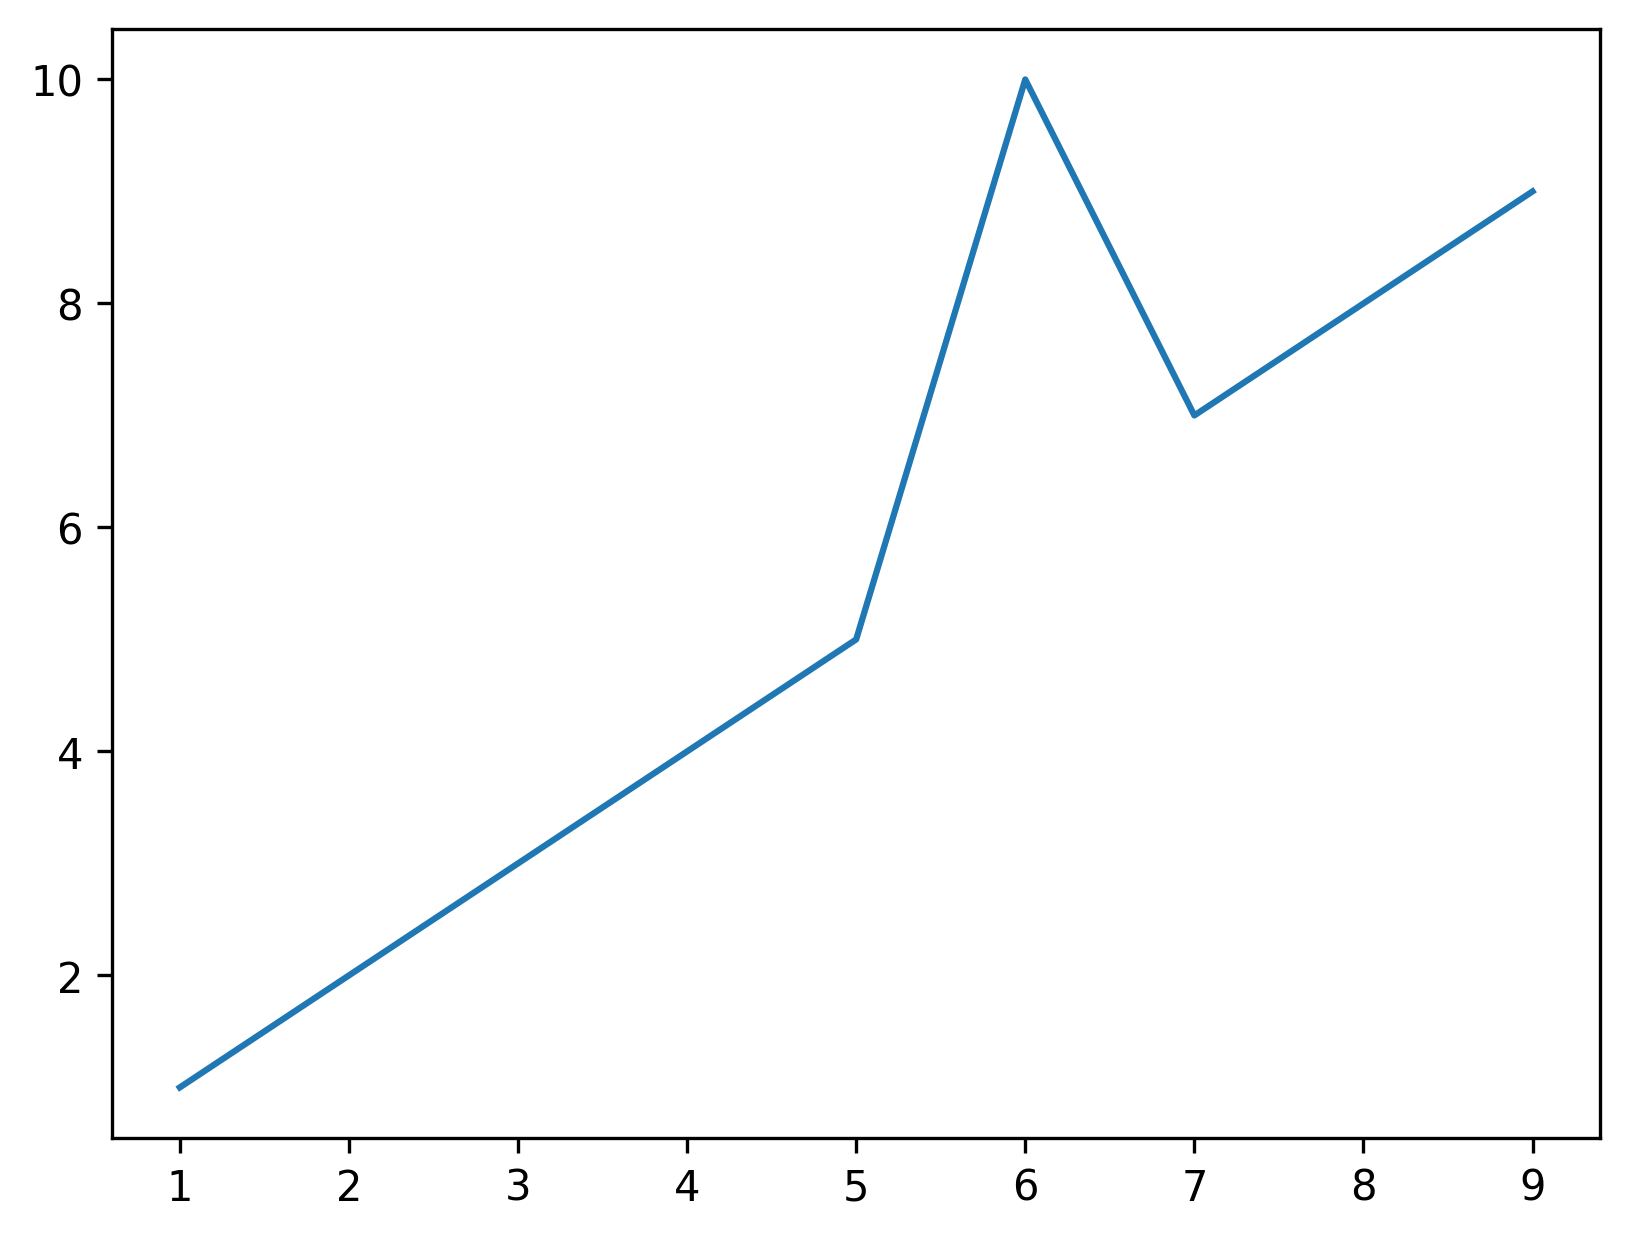

In [2]:
import matplotlib.pyplot as plt

plt.plot(
   [1,2,3,4,5,6,7,8,9],
   [1,2,3,4,5,10,7,8,9]
)
plt.show()

fig, ax = plt.subplots()
ax.plot(
   [1,2,3,4,5,6,7,8,9],
   [1,2,3,4,5,10,7,8,9]
)
plt.show()

<b><br>

## Remove right and top spines

In Matplotlib, eliminating the top and right spines from a plot can significantly improve its visual appeal and clarity. This modification is particularly effective for scatter, bubble, and time series charts, where these spines may be visually intrusive and unnecessary. To achieve this cleaner look, you can use the following code snippet:

This adjustment directs the viewer’s focus towards the data itself, creating a more streamlined and professional presentation by minimizing the plot’s frame.

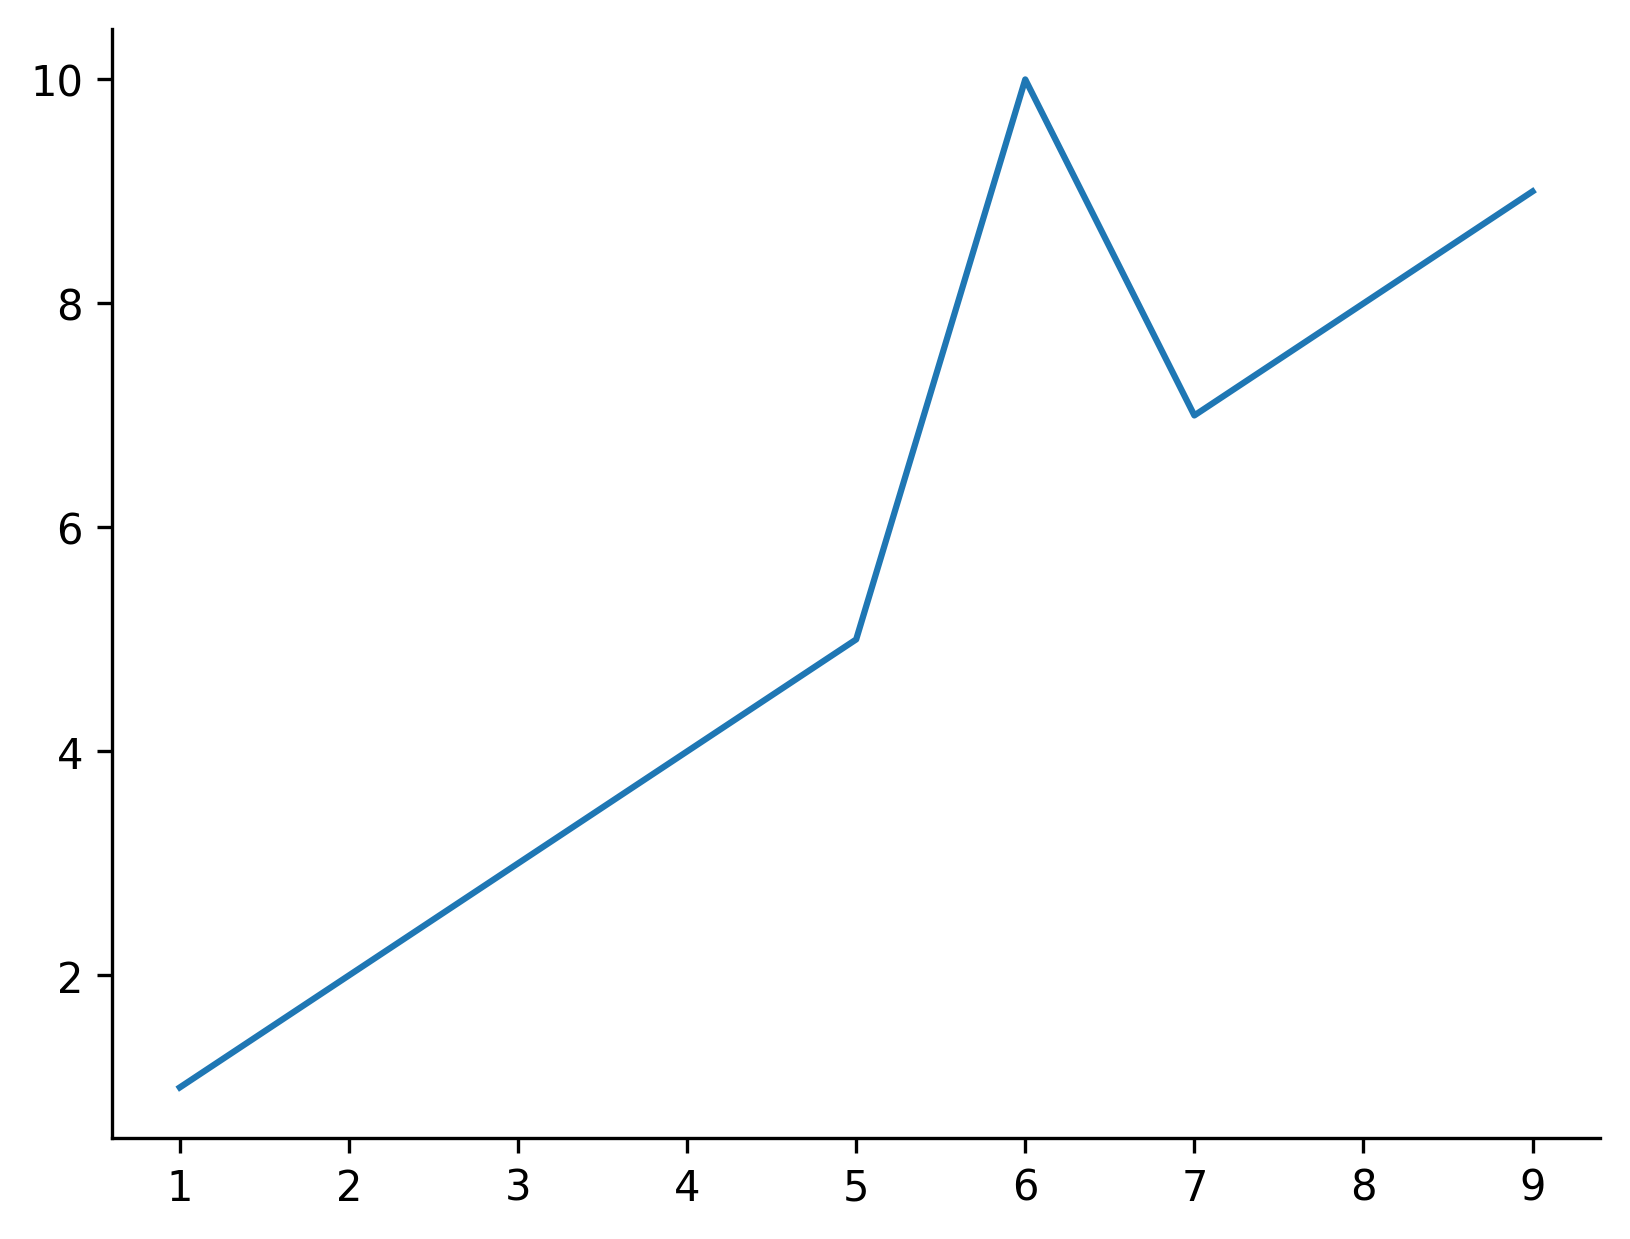

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(
   [1,2,3,4,5,6,7,8,9],
   [1,2,3,4,5,10,7,8,9]
)

# remove top and right spines
ax.spines[['top', 'right']].set_visible(False)

plt.show()

<b><br>

## Consider Code Verbosity

- **Address Verbosity in Matplotlib**: Given that Matplotlib can generate verbose code for complex charts, it’s crucial to structure your code clearly and reproducibly.
- **Organize Code Efficiently**: Begin by defining “parameters” with **clear, explicit names** at the top of your script. These parameters will be utilized throughout your code.
- **Enhance Code Usability**: By placing parameters at the beginning, you simplify the process of modifying them to update the output, making them easily locatable within the code. This strategy fosters better maintainability and readability.

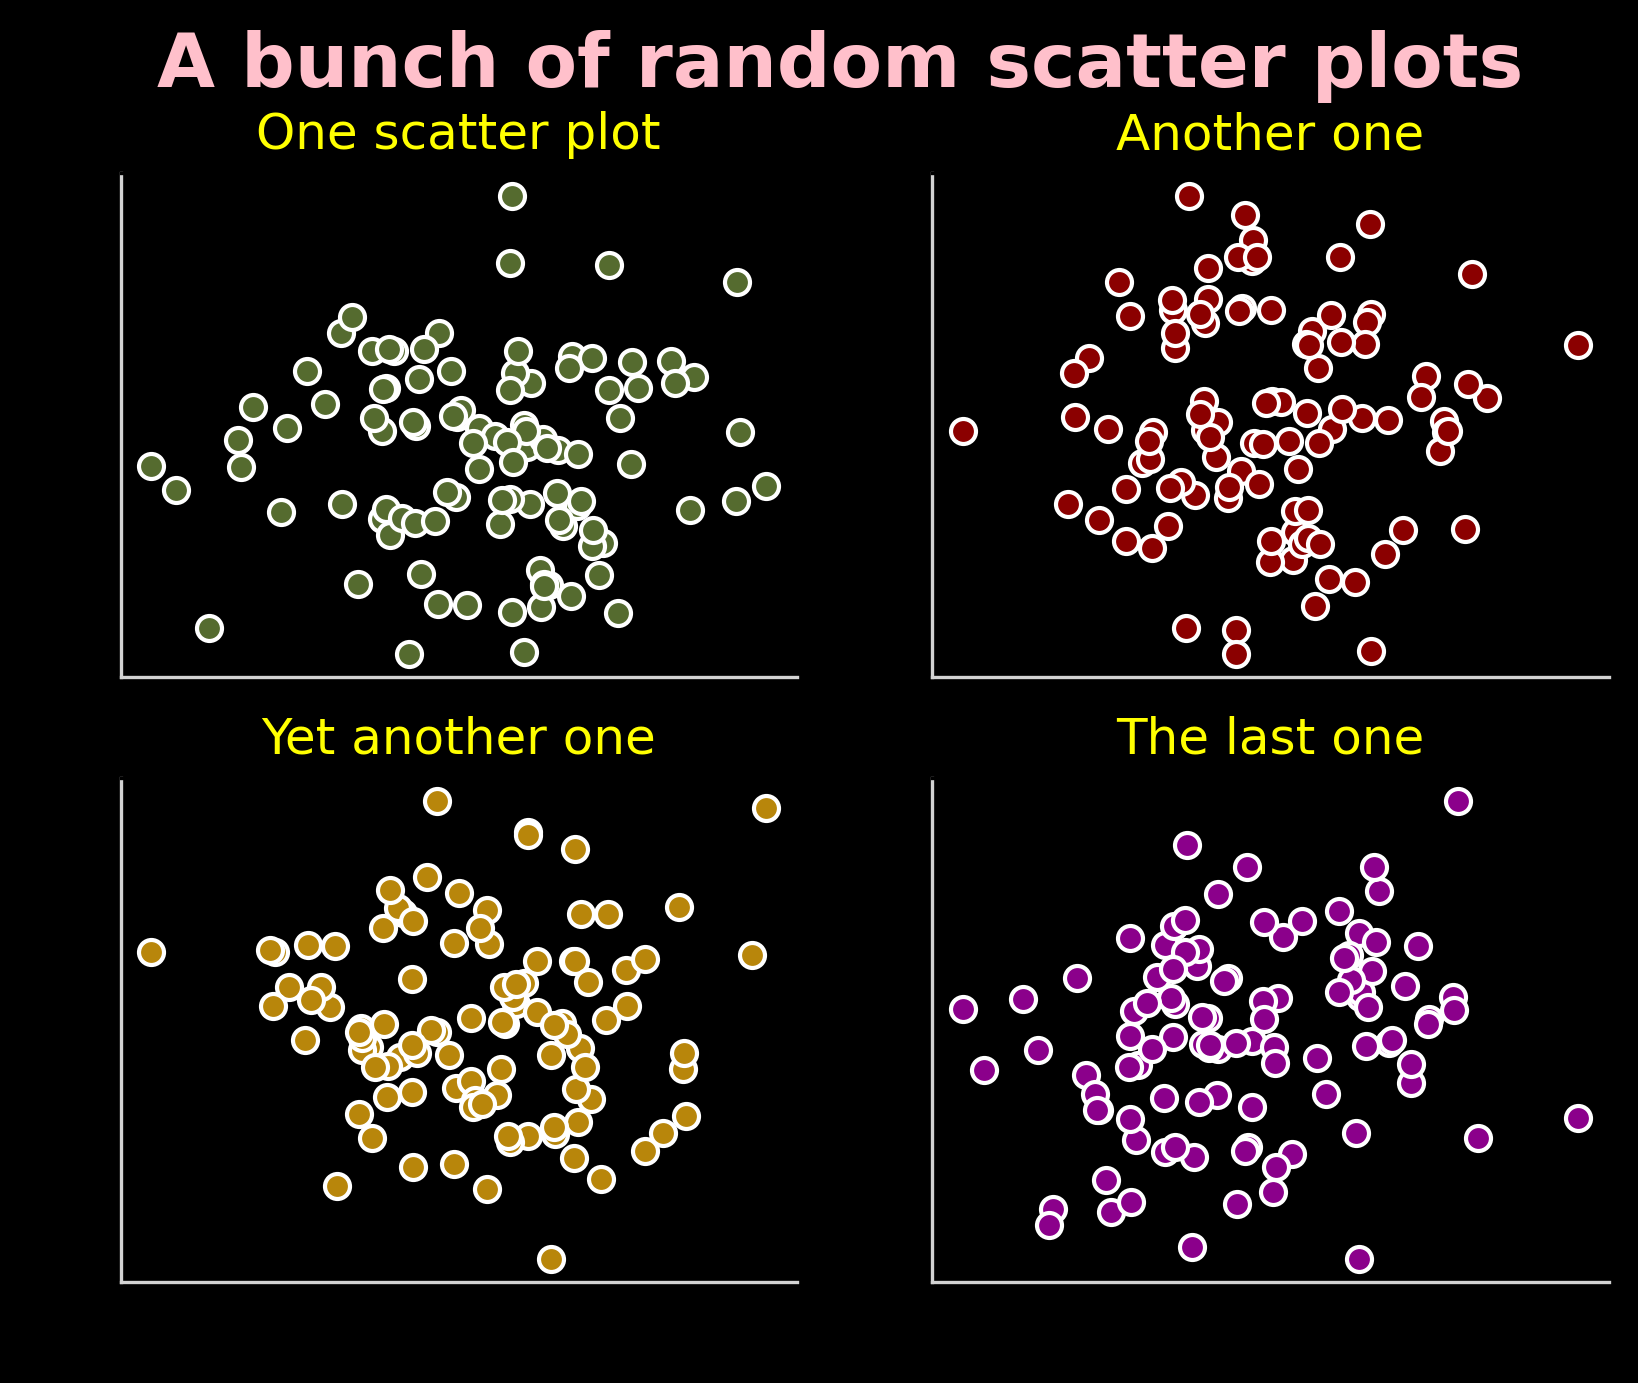

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# parameters
colors = [
   'darkolivegreen', 'darkred',
   'darkgoldenrod', 'darkmagenta'
]
titles = [
   'One scatter plot', 'Another one',
   'Yet another one', 'The last one'
]
title = 'A bunch of random scatter plots'
dpi = 300
background_color = 'black'
edgecolor = 'white'
title_scatter_color = 'yellow'
title_color = 'pink'
spine_color = 'lightgrey'


# initiate chart
fig, axs = plt.subplots(nrows=2, ncols=2, dpi=dpi)
fig.set_facecolor(background_color)

# create chart
for i,ax in enumerate(axs.flat):
   
   # custom axes
   ax.set_facecolor(background_color)
   ax.spines[['bottom', 'left']].set_color(spine_color)

   # actually add the scatter plot
   ax.scatter(
      np.random.normal(size=100),
      np.random.normal(size=100),
      edgecolor=edgecolor,
      color=colors[i]
   )
   
   # title for each scatter plot
   ax.set_title(
	   titles[i],
	   color=title_scatter_color
	 )

# add a title
fig.suptitle(
   title,
   color=title_color,
   fontweight='bold',
   fontsize=18
)

plt.show()

<b><br>

## Avoid default title() function

**Opt for `highlight_text` and `textwrap` over default `title()`**:

- **Enhance Styling with `highlight_text`**: This function facilitates applying varied styles within the same Python string, enabling more dynamic and visually appealing text.
    
- **Improve Layout with `textwrap`**: Utilize `textwrap` to automatically wrap text to a new line every `n` characters (suggested: 30), ensuring a cleaner and more readable title presentation.

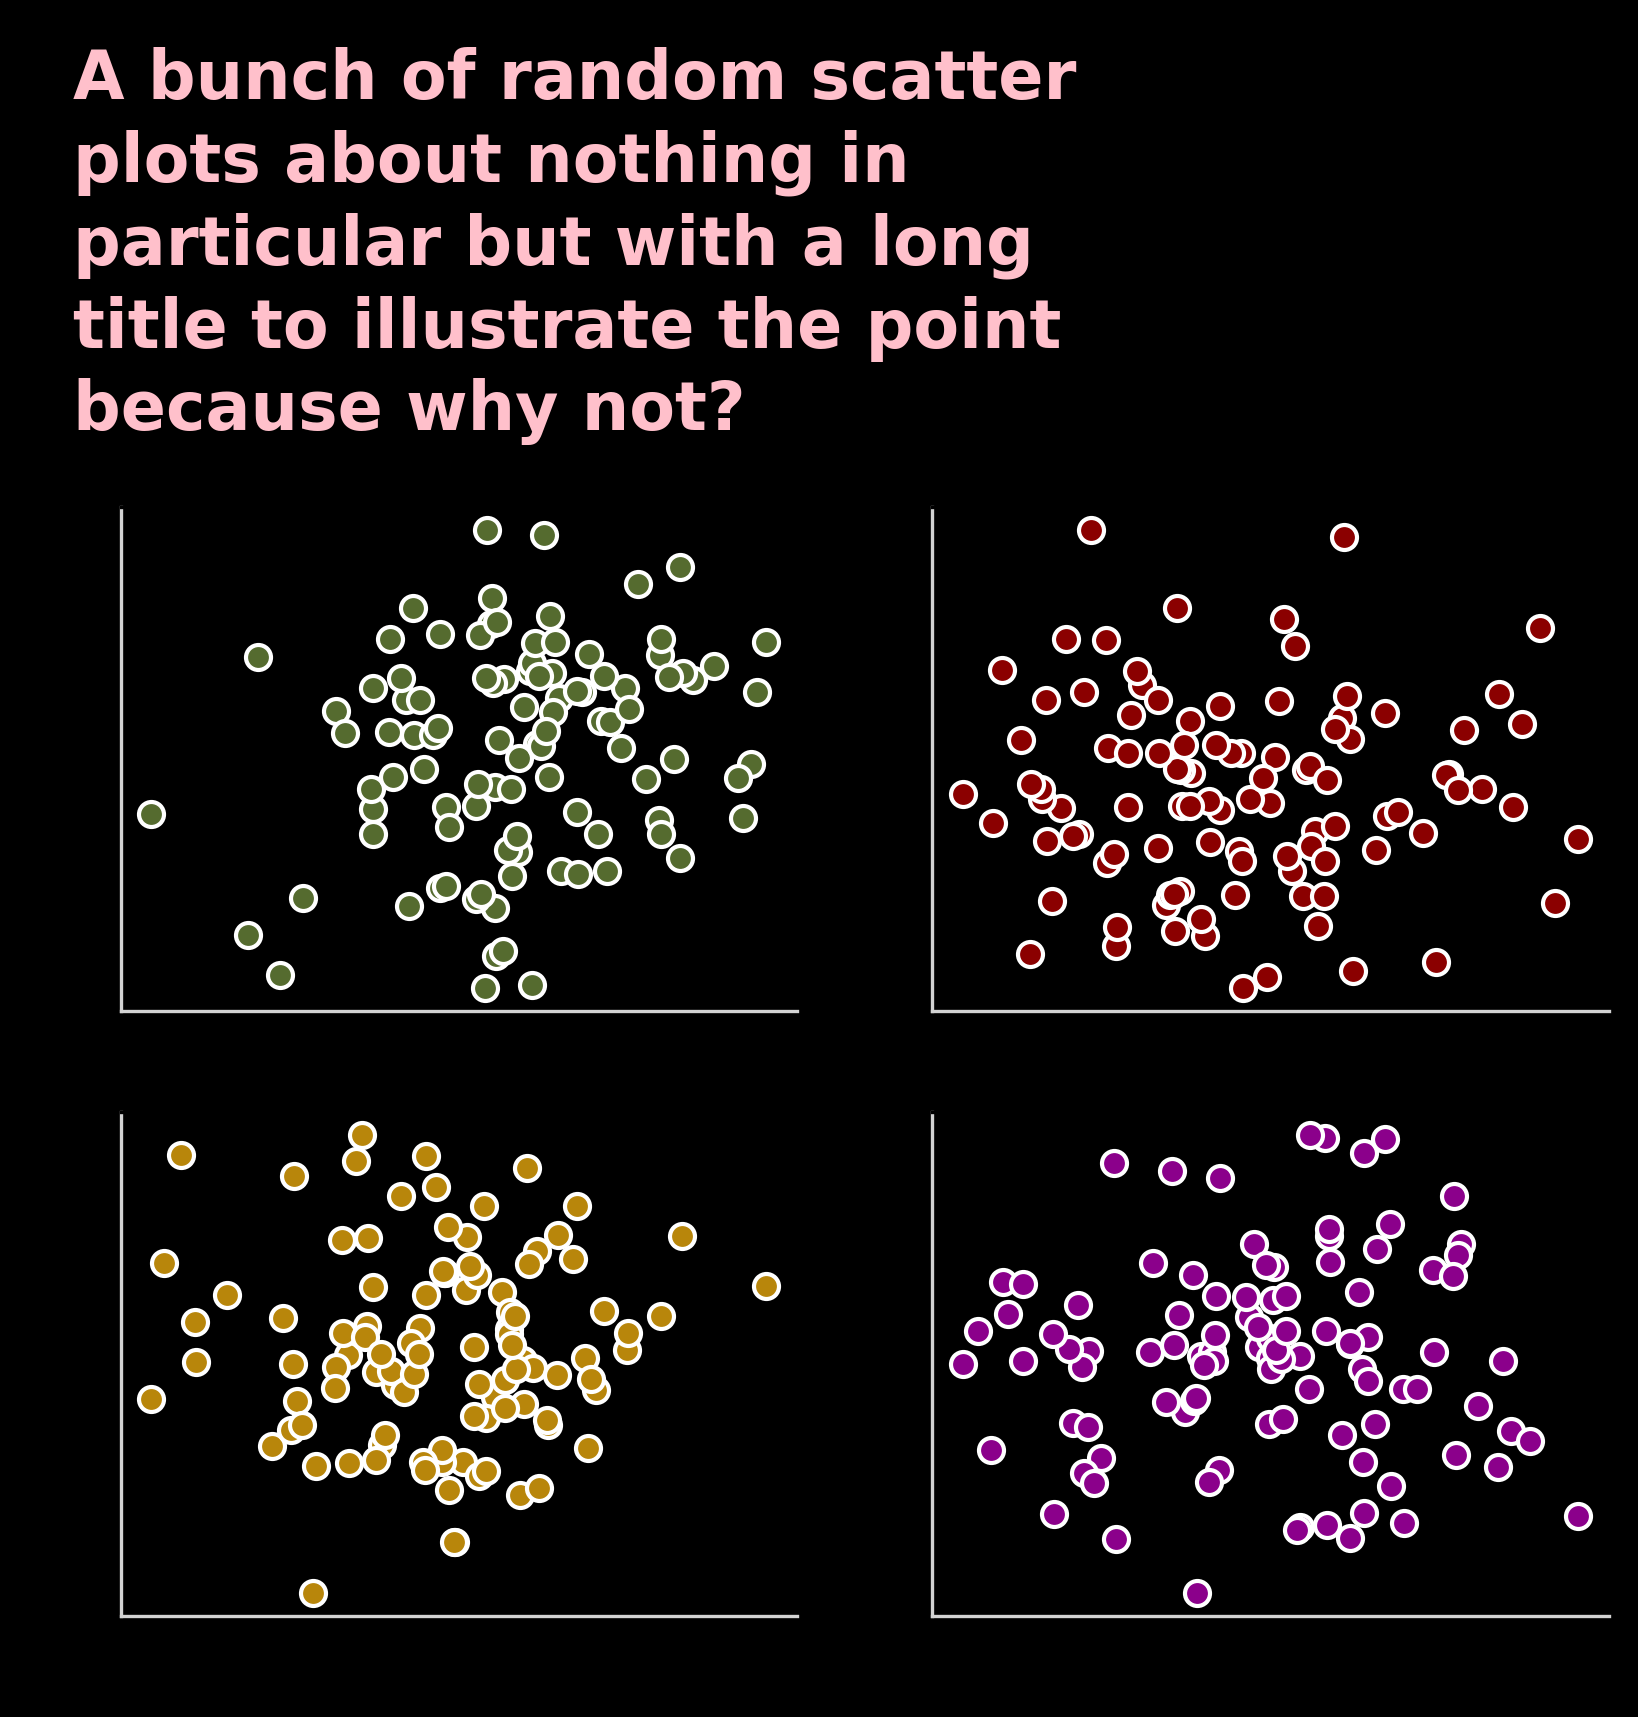

In [7]:
import matplotlib.pyplot as plt
from highlight_text import fig_text
import numpy as np
import textwrap

# parameters
colors = [
   'darkolivegreen', 'darkred',
   'darkgoldenrod', 'darkmagenta'
]
titles = [
   'One scatter plot', 'Another one',
   'Yet another one', 'The last one'
]
title = 'A bunch of random scatter plots about nothing in particular but with a long title to illustrate the point because why not?'
title = textwrap.fill(
   title,
   width=30 # max characters per line
)
dpi = 300
background_color = 'black'
edgecolor = 'white'
title_scatter_color = 'yellow'
title_color = 'pink'
spine_color = 'lightgrey'

# initiate chart
fig, axs = plt.subplots(nrows=2, ncols=2, dpi=dpi)
fig.set_facecolor(background_color)

# title
fig_text(
   0.1, 1.2,
   title,
   color=title_color,
   va='top', ha='left',
   fontweight='bold',
   fontsize=16
)

# create chart
for i,ax in enumerate(axs.flat):
   
   # custom axes
   ax.set_facecolor(background_color)
   ax.spines[['bottom', 'left']].set_color(spine_color)

   # actually add the scatter plot
   ax.scatter(
      np.random.normal(size=100),
      np.random.normal(size=100),
      edgecolor=edgecolor,
      color=colors[i]
   )

plt.show()

<b><br>

## Create your own color map

Even if matplotlib provides lots of nice color maps, you might want to use specific colors and create your own colormap. Fortunately, matplotlib provides a `LinearSegmentedColormap` class that allows you to define your custom color map.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_gradient_colormap(colors, N=256):
    """
    Based on a list of colors (of any length), this function creates a
    custom gradient colormap with N colors.
    256 can be considered as large enough for most use cases.
    """
    cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=N)
    return cmap

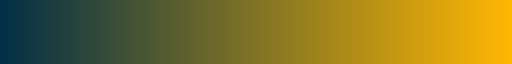

In [41]:
# Create a custom colormap
colors = ['#023047', '#ffb703']
cmap1 = create_gradient_colormap(colors)
cmap1


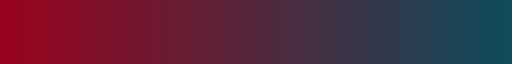

In [42]:
# Create a custom colormap
colors = ['#9a031e', '#0f4c5c']
cmap2 = create_gradient_colormap(colors)
cmap2

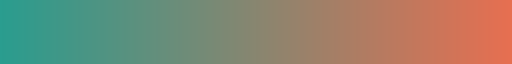

In [43]:
# Create a custom colormap
colors = ['#2a9d8f', '#e76f51']
cmap3 = create_gradient_colormap(colors)
cmap3

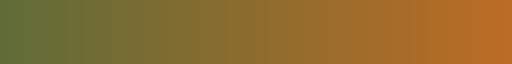

In [44]:
# Create a custom colormap
colors = ['#606c38', '#bc6c25']
cmap4 = create_gradient_colormap(colors)
cmap4

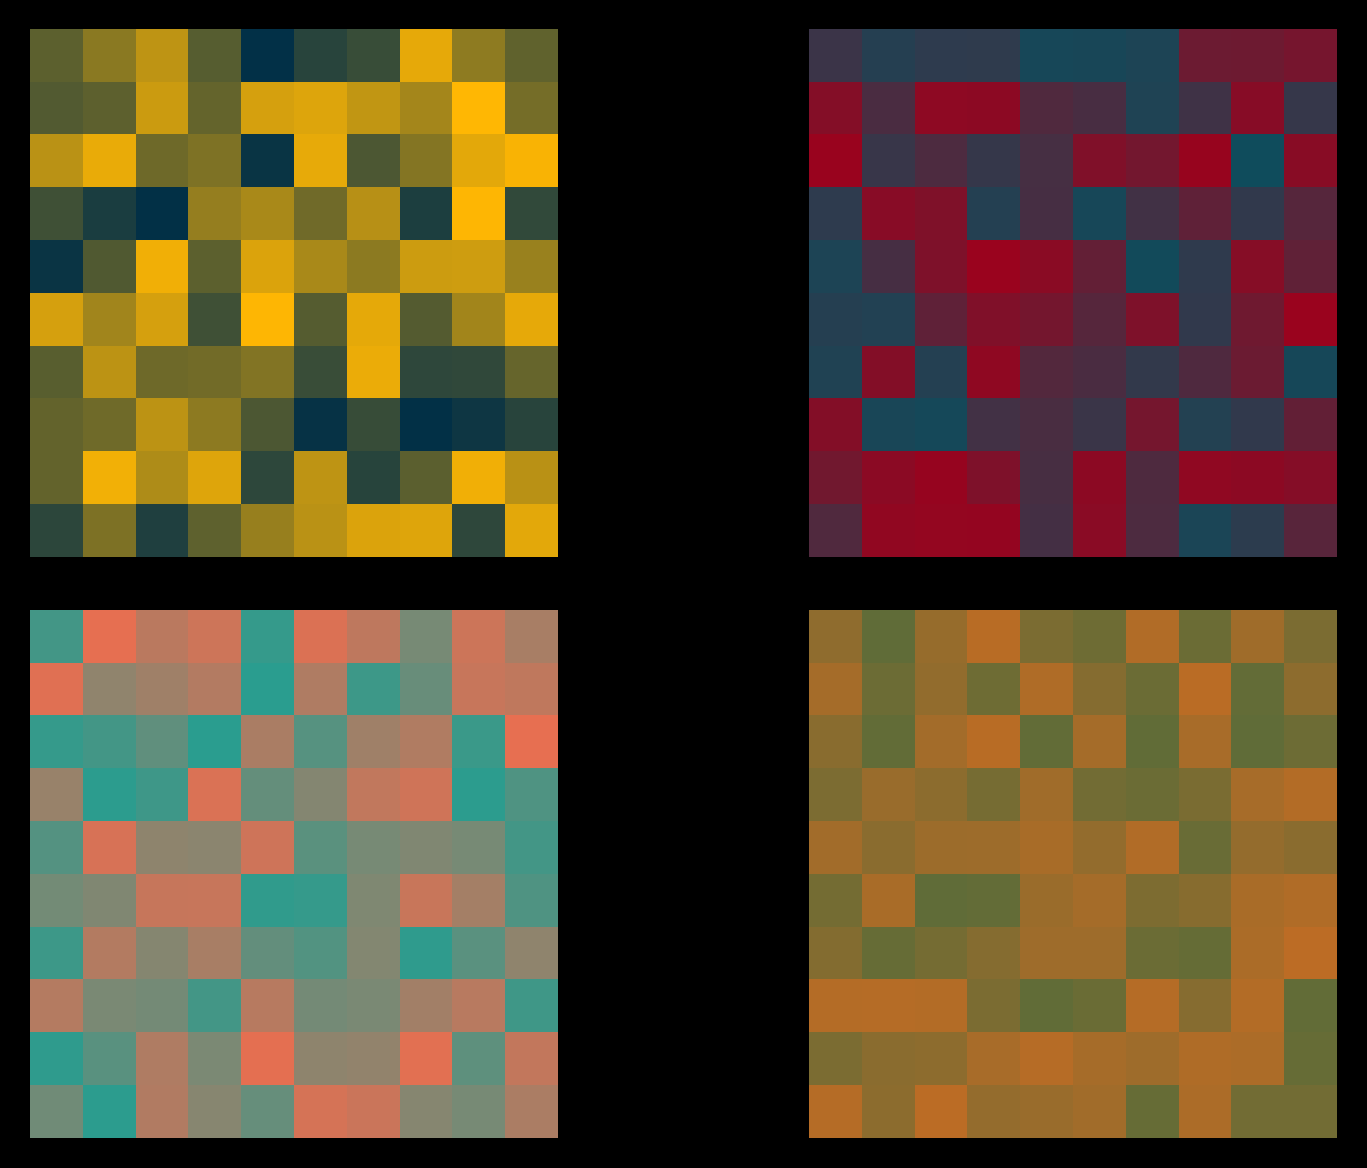

In [49]:
# create the chart
fig, axs = plt.subplots(2,2, dpi=300)
fig.set_facecolor('black') # change background color

# reduce margin between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for ax,cmap in zip(axs.flat, [cmap1, cmap2, cmap3, cmap4]):
    ax.imshow(
       np.random.rand(10, 10),
       cmap=cmap
    )
    ax.set_axis_off()
plt.show()

<b><br>

## Match the title and chart colors for clarity

The `highlight_text` library offers a **simplified method** for adding colored annotations to visualizations in Python. This library includes two primary functions:

- **`fig_text()`**: Integrates text directly into the figure.
- **`ax_text()`**: Places text within a specific axes.

By defining a color list, we can **map these colors** both in the chart's title and its body, eliminating the need for a traditional legend. This approach **streamlines the understanding** of the chart's color scheme directly through the text.

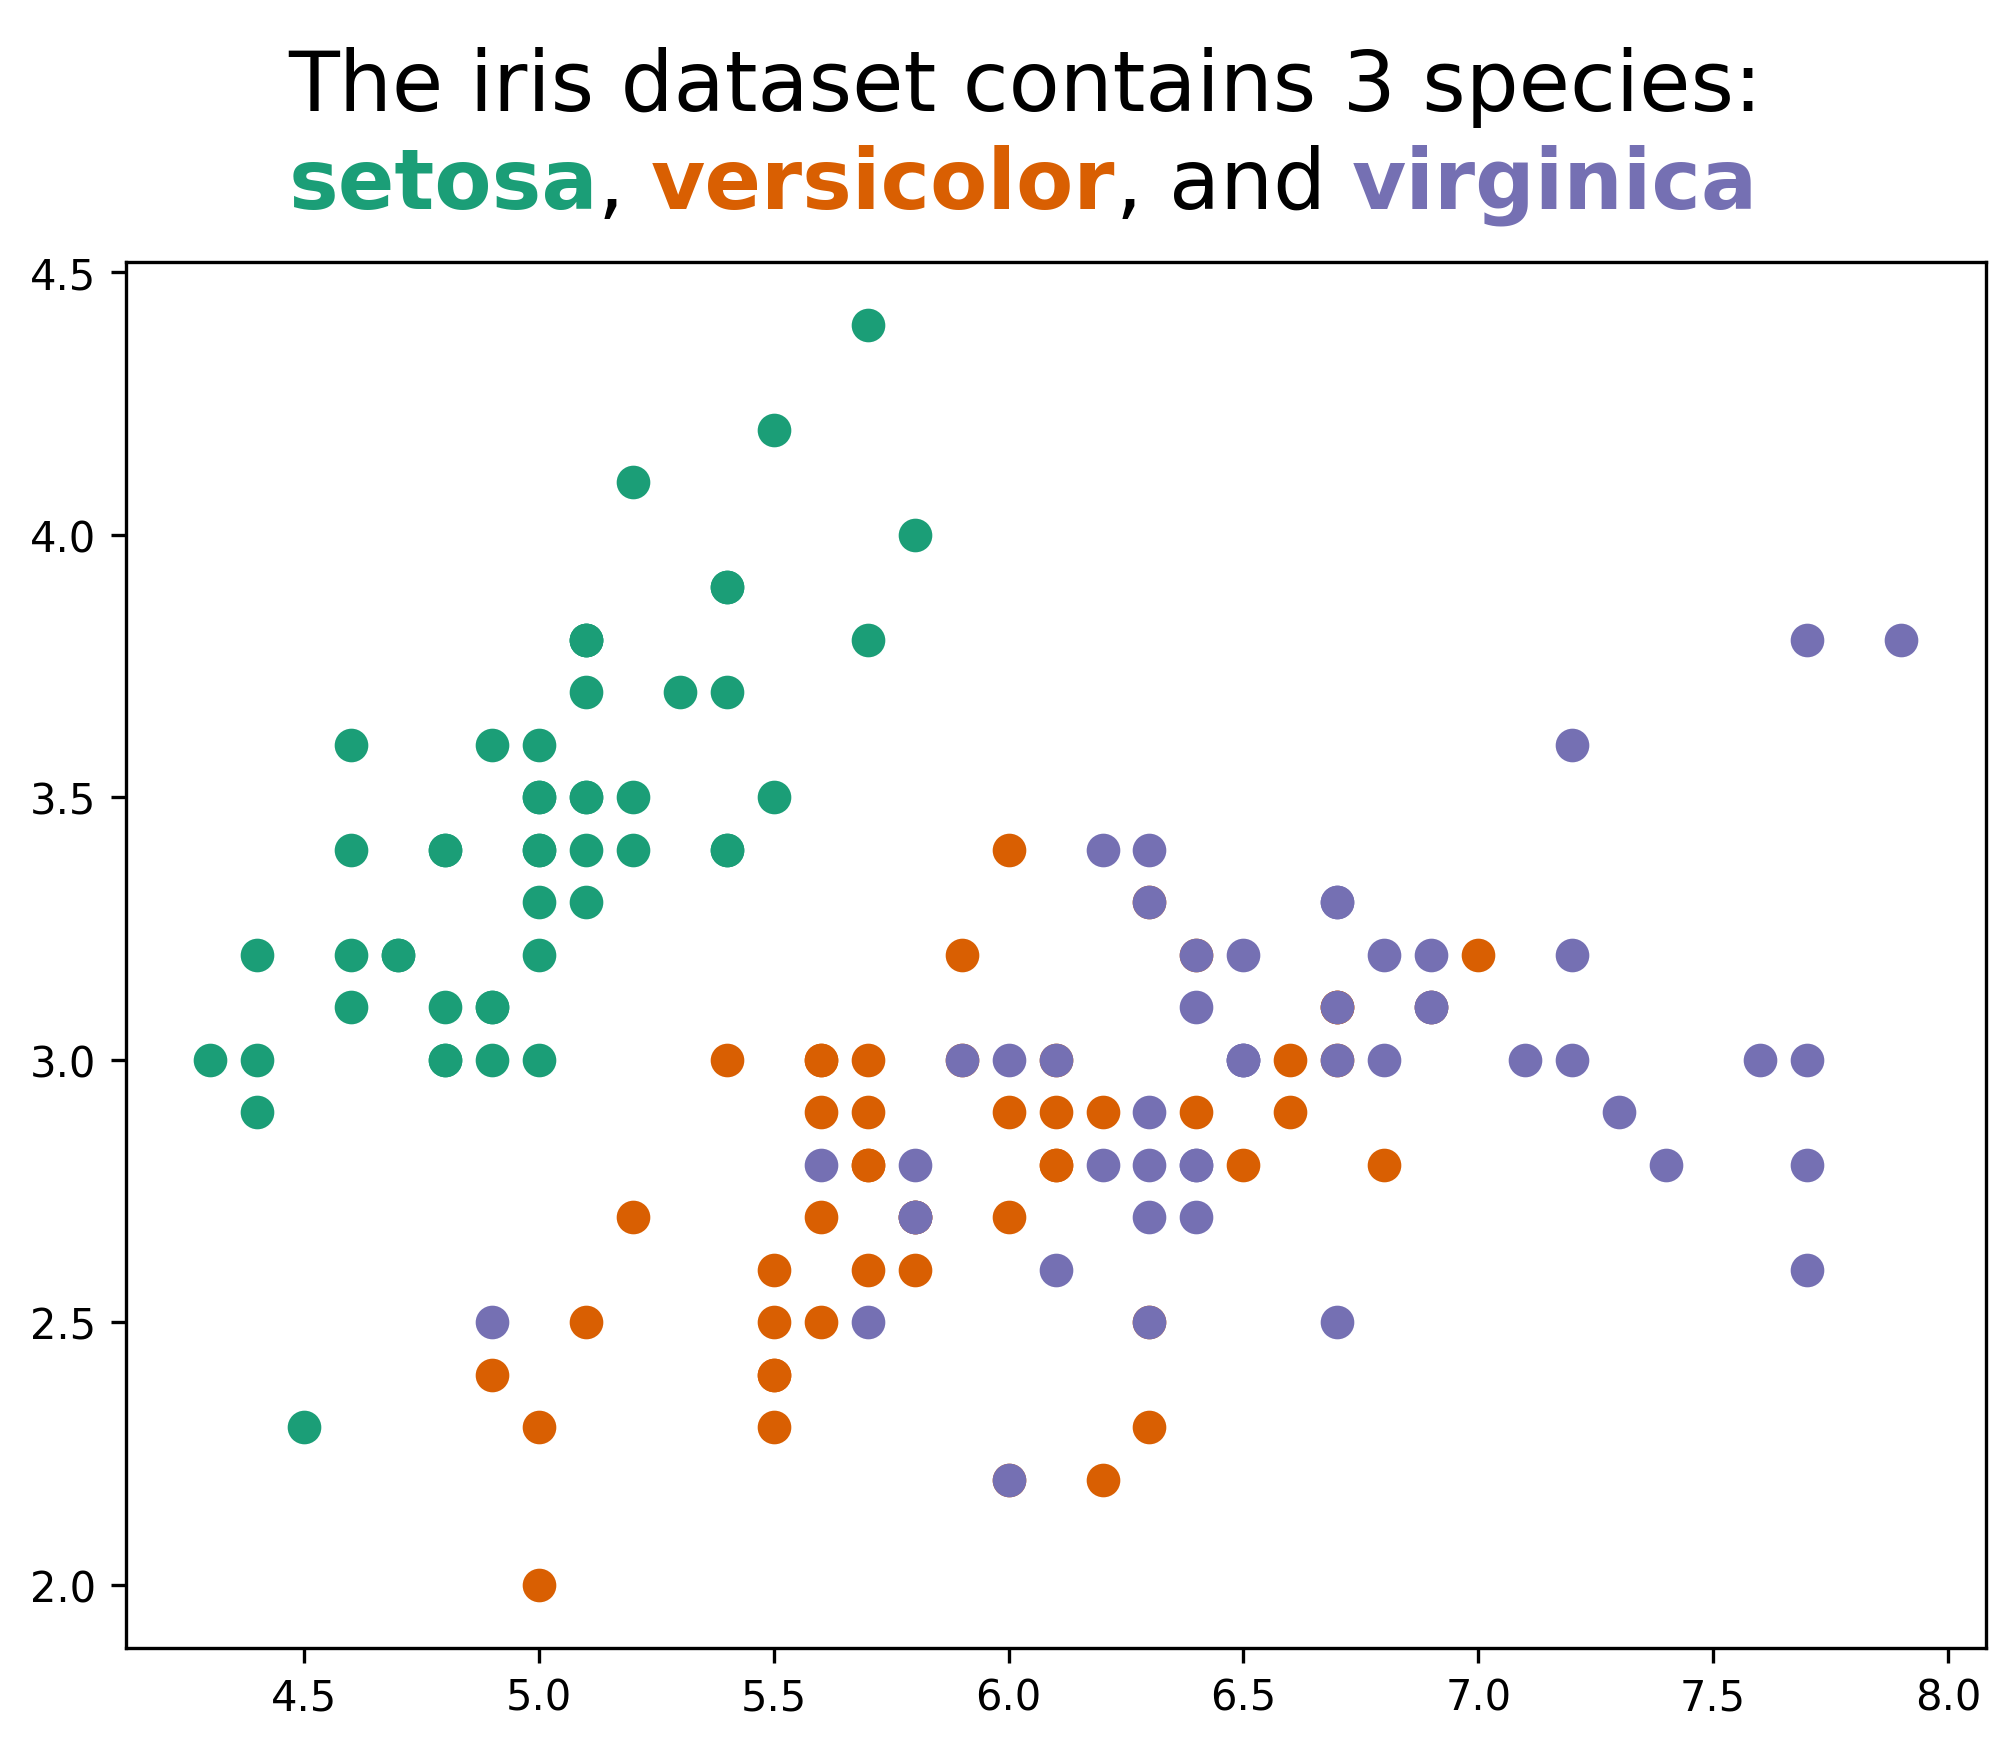

In [57]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text

# dataset
dataset = 'master/static/data/iris.csv'
iris = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/'+dataset)

# create the chart
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
colors = ["#1B9E77", "#D95F02", "#7570B3"]
for species, color in zip(iris['species'].unique(), colors):
    subset = iris[iris['species'] == species]
    ax.scatter(subset['sepal_length'], subset['sepal_width'], c=color, label=species, s=50)

# annotation for the title
text = 'The iris dataset contains 3 species:\n<setosa>, <versicolor>, and <virginica>'
fig_text(
    s=text,
    x=.5, y=1,
    fontsize=20,
    color='black',
    highlight_textprops=[{"color": colors[0], 'fontweight': 'bold'},
                         {"color": colors[1], 'fontweight': 'bold'},
                         {"color": colors[2], 'fontweight': 'bold'}],
    ha='center'
)

plt.show()